# ESCUELA POLITÉCNICA NACIONAL
# MÉTODOS NUMÉRICOS

## [Tarea 12] Ejercicios Unidad 05-A | ODE Método de Euler

### JHONN ALEXANDER SAETEROS LAIME

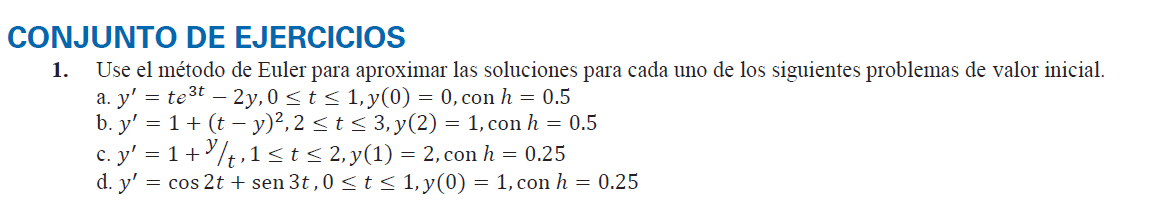

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, cos, sin, tan, log

# Definición de funciones para los problemas

## Ejercicio 1 y 2
def f1a(t, y): return t * exp(3*t) - 2*y
def sol1a(t): return (1/5)*t*exp(3*t) - (1/25)*exp(3*t) + (1/25)*exp(-2*t)

def f1b(t, y): return 1 + (t - y)**2
def sol1b(t): return t + 1/(1 - t)

def f1c(t, y): return 1 + y/t
def sol1c(t): return t * log(t) + 2*t

def f1d(t, y): return cos(2*t) + sin(3*t)
def sol1d(t): return (1/2)*sin(2*t) - (1/3)*cos(3*t) + 4/3

## Ejercicio 3 y 4
def f3a(t, y): return y/t - (y/t)**2
def sol3a(t): return t / log(t)

def f3b(t, y): return 1 + y/t + (y/t)**2
def sol3b(t): return t * tan(log(t))

def f3c(t, y): return -(y + 1)*(y + 3)
def sol3c(t): return -3 + 2/(1 + exp(-2*t))

def f3d(t, y): return -5*y + 5*t**2 + 2*t
def sol3d(t): return t**2 + (1/3)*exp(-5*t)

# Implementación del método de Euler
def euler_method(f, t0, y0, h, n):
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    t[0] = t0
    y[0] = y0
    
    for i in range(n):
        y[i+1] = y[i] + h * f(t[i], y[i])
        t[i+1] = t[i] + h
        
    return t, y

# Implementación del método de Taylor de orden 2
def taylor_order2(f, df, t0, y0, h, n):
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    t[0] = t0
    y[0] = y0
    
    for i in range(n):
        f_val = f(t[i], y[i])
        df_val = df(t[i], y[i])
        y[i+1] = y[i] + h * f_val + (h**2)/2 * df_val
        t[i+1] = t[i] + h
        
    return t, y

# Implementación del método de Taylor de orden 4
def taylor_order4(f, df, d2f, d3f, t0, y0, h, n):
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    t[0] = t0
    y[0] = y0
    
    for i in range(n):
        ti, yi = t[i], y[i]
        f_val = f(ti, yi)
        df_val = df(ti, yi)
        d2f_val = d2f(ti, yi)
        d3f_val = d3f(ti, yi)
        
        y[i+1] = yi + h * f_val + (h**2)/2 * df_val + (h**3)/6 * d2f_val + (h**4)/24 * d3f_val
        t[i+1] = ti + h
        
    return t, y

# Funciones para calcular derivadas necesarias para Taylor

## Derivadas para ejercicio 1a
def df1a(t, y): return exp(3*t) + 3*t*exp(3*t) - 2*f1a(t, y)
def d2f1a(t, y): return 3*exp(3*t) + 3*exp(3*t) + 9*t*exp(3*t) - 2*df1a(t, y)
def d3f1a(t, y): return 18*exp(3*t) + 27*t*exp(3*t) - 2*d2f1a(t, y)

## Derivadas para ejercicio 1b
def df1b(t, y): return 2*(t - y)*(1 - f1b(t, y))
def d2f1b(t, y): return 2*(1 - f1b(t, y))**2 - 2*(t - y)*df1b(t, y)
def d3f1b(t, y): return -6*(1 - f1b(t, y))*df1b(t, y) - 2*(t - y)*d2f1b(t, y)

## Derivadas para ejercicio 1c
def df1c(t, y): return -y/t**2 + f1c(t, y)/t
def d2f1c(t, y): return 2*y/t**3 - 2*f1c(t, y)/t**2 + df1c(t, y)/t
def d3f1c(t, y): return -6*y/t**4 + 6*f1c(t, y)/t**3 - 3*df1c(t, y)/t**2 + d2f1c(t, y)/t

## Derivadas para ejercicio 1d
def df1d(t, y): return -2*sin(2*t) + 3*cos(3*t)
def d2f1d(t, y): return -4*cos(2*t) - 9*sin(3*t)
def d3f1d(t, y): return 8*sin(2*t) - 27*cos(3*t)

# Función para calcular errores
def calculate_errors(t, y_approx, exact_solution):
    y_exact = np.array([exact_solution(ti) for ti in t])
    errors = np.abs(y_exact - y_approx)
    return errors, y_exact

# Función para imprimir resultados
def print_results(t, y_approx, y_exact, errors):
    print("{:<10} {:<15} {:<15} {:<15}".format("t", "Aproximado", "Exacto", "Error"))
    for ti, ya, ye, err in zip(t, y_approx, y_exact, errors):
        print("{:<10.3f} {:<15.6f} {:<15.6f} {:<15.6f}".format(ti, ya, ye, err))
    print("\nError máximo: {:.6f}".format(max(errors)))

Problema 1a:
t          Aproximado      Exacto          Error          
0.000      0.000000        0.000000        0.000000       
0.500      0.000000        0.283617        0.283617       
1.000      1.120422        3.219099        2.098677       

Error máximo: 2.098677


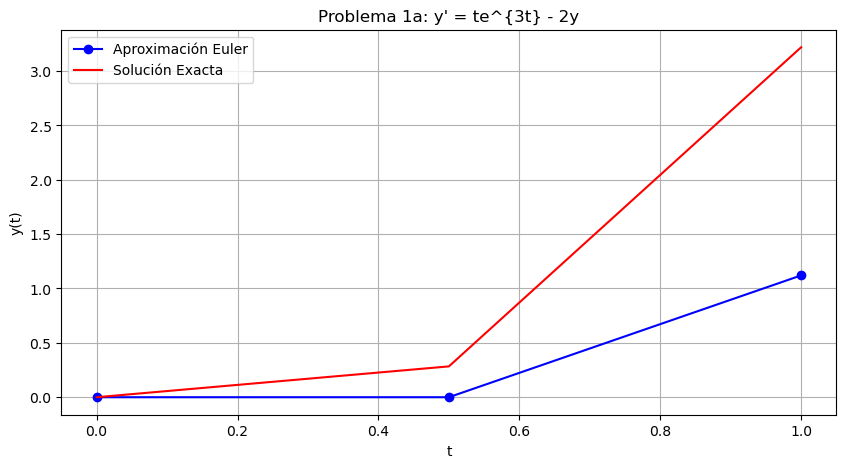

In [11]:
# 1.a)
# Parámetros
t0, y0 = 0, 0
h = 0.5
n = int(1/h)

# Solución
t, y = euler_method(f1a, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1a)

# Resultados
print("Problema 1a:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1a: y' = te^{3t} - 2y")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()


Problema 1b:
t          Aproximado      Exacto          Error          
2.000      1.000000        1.000000        0.000000       
2.500      2.000000        1.833333        0.166667       
3.000      2.625000        2.500000        0.125000       

Error máximo: 0.166667


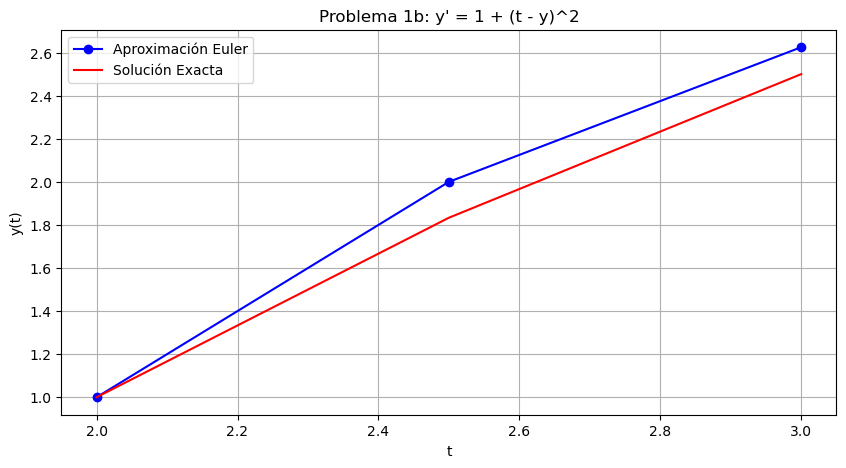

In [12]:
# 1.b)
# Parámetros
t0, y0 = 2, 1
h = 0.5
n = int((3-2)/h)

# Solución
t, y = euler_method(f1b, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1b)

# Resultados
print("Problema 1b:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1b: y' = 1 + (t - y)^2")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

Problema 1c:
t          Aproximado      Exacto          Error          
1.000      2.000000        2.000000        0.000000       
1.250      2.750000        2.778929        0.028929       
1.500      3.550000        3.608198        0.058198       
1.750      4.391667        4.479328        0.087661       
2.000      5.269048        5.386294        0.117247       

Error máximo: 0.117247


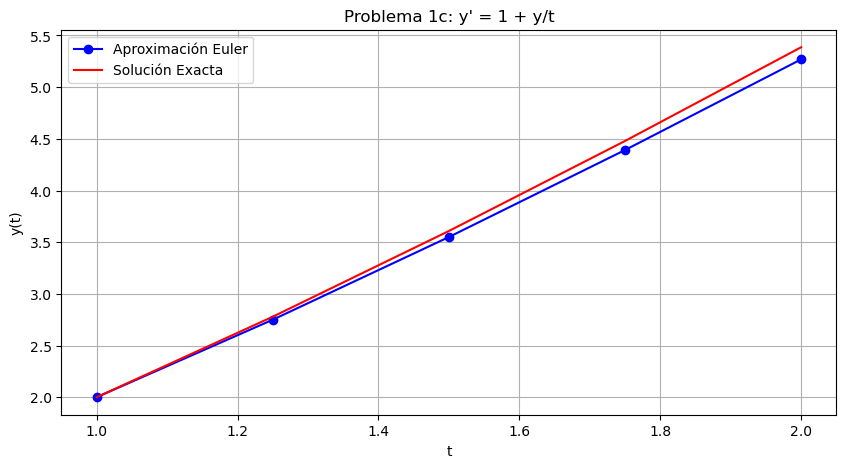

In [13]:
# 1.c)
# Parámetros
t0, y0 = 1, 2
h = 0.25
n = int((2-1)/h)

# Solución
t, y = euler_method(f1c, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1c)

# Resultados
print("Problema 1c:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1c: y' = 1 + y/t")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

Problema 1d:
t          Aproximado      Exacto          Error          
0.000      1.000000        1.000000        0.000000       
0.250      1.250000        1.329150        0.079150       
0.500      1.639805        1.730490        0.090684       
0.750      2.024255        2.041472        0.017217       
1.000      2.236457        2.117980        0.118478       

Error máximo: 0.118478


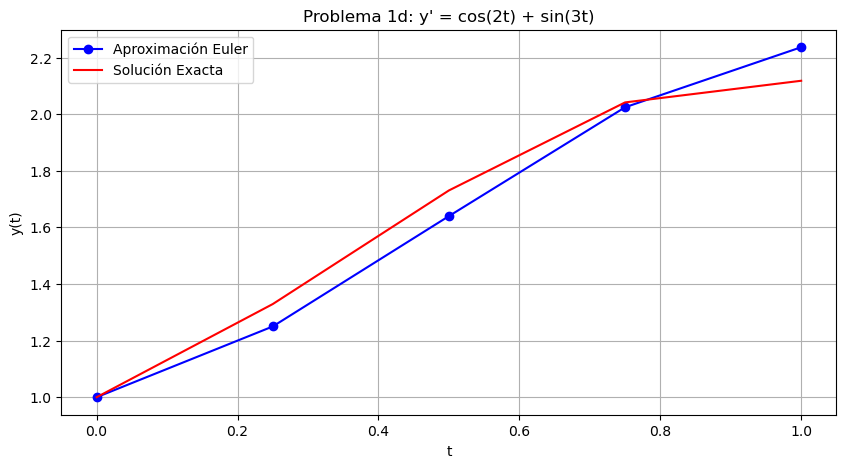

In [14]:
# 1.d)
# Parámetros
t0, y0 = 0, 1
h = 0.25
n = int(1/h)

# Solución
t, y = euler_method(f1d, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1d)

# Resultados
print("Problema 1d:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1d: y' = cos(2t) + sin(3t)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()